<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Помежуточный-вывод-номер-раз-:" data-toc-modified-id="Помежуточный-вывод-номер-раз-:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Помежуточный вывод номер раз :</a></span></li><li><span><a href="#Помежуточный-вывод-номер-два:" data-toc-modified-id="Помежуточный-вывод-номер-два:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Помежуточный вывод номер два:</a></span></li><li><span><a href="#Вывод-по-блоку-'Подготовка-данных':" data-toc-modified-id="Вывод-по-блоку-'Подготовка-данных':-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод по блоку 'Подготовка данных':</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-блоку-'Борьба-с-дисбалансом':" data-toc-modified-id="Вывод-по-блоку-'Борьба-с-дисбалансом':-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод по блоку 'Борьба с дисбалансом':</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-блоку-'Обучение-моделей':" data-toc-modified-id="Вывод-по-блоку-'Обучение-моделей':-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод по блоку 'Обучение моделей':</a></span></li></ul></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-блоку-'Тестирование-лучшей-модели':" data-toc-modified-id="Вывод-по-блоку-'Тестирование-лучшей-модели':-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод по блоку 'Тестирование лучшей модели':</a></span></li></ul></li><li><span><a href="#Вывод-по-проекту:" data-toc-modified-id="Вывод-по-проекту:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод по проекту:</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Галя, у нас тут новый проект от яндекса. Новые приключения

Как гласит легенда, ни слова больше 

In [1]:
import pandas as pd
import datetime as dt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import scipy.stats as st
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from scipy import stats as st
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.utils import shuffle


from sklearn.metrics import roc_curve 
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import roc_auc_score


In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df=pd.read_csv(r'C:\Users\Admin\Desktop\Bank\Churn.csv')


In [3]:
#Функция вывода инфы о массиве первые и последние 5 строк
def headtail(df_name):
    display('Head 5')
    display(df_name.head(5))
    display('Tail 5')
    display(df_name.tail(5))

## Исследование задачи

In [4]:
headtail(df)

'Head 5'

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


'Tail 5'

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


Галя, наблюдаются качественные и количественные признаки, и как всегда юзер айди- номер строки, как говорится


Глянем на shape и dtype

In [5]:
print('В массиве',df.shape[0],'строк','и',df.shape[1],'столбцов' )

В массиве 10000 строк и 14 столбцов


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

А, не подождите у нас есть волшебное поле  CustomerId, не все так плохо, 
позднее вернемся к типам данных, проведем маленьку оценку по пропускам и дубликатам

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

In [8]:
print('Пропусков по полю Tenure',df['Tenure'].isna().sum())

Пропусков по полю Tenure 909


Данные имеют пропуски по полю  'Tenure'. Что там по дубликатам?

In [9]:
display(df.duplicated().sum())

0

Возможно, есть неявные, впрочем, вскрытие покажет

Пояснительная бригада по полям говорит, что:

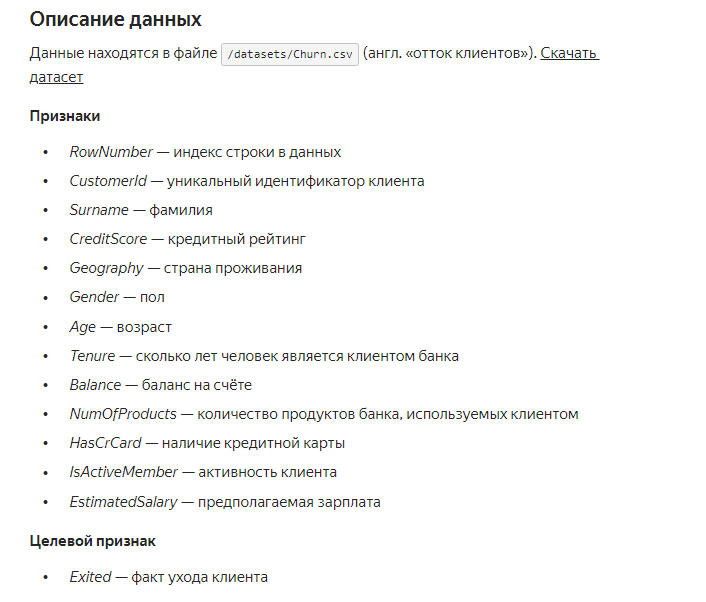

Вероятно Tenure, который isna это новые клиенты банка, их  бы в отдельную группу закинуть, 
чтобы веселее было, но мы это проверим, целевой признак формата bool?


Хорошо, нам же лучше, 
надо будет еще корелляцию между критериями рассмотреть, дабы не получить конфуз. Зачем вывели индекс строки в отдельный признак ? Вероятно- мусор при выгрузке. Дропаем 

Для чего нам Surname? Потенциальных родственников искать - информации мало, поэтому тоже дропаем. Кредитный рейтинг - можно оставить, География- тоже, пол, возраст, Tenure Balance оставить, NumOfProducts - вероятно дроп, так как возможна зависимость с другими параметрами, например то же наличие кредитной карты. Аctive member тоже под вопросом, Estimated salary аналогично, возможно вычисляемое поле с сильной зависимостью от остальных

А, кажется, начинаю понимать, можно сшить отдельное поле для Ohe. Через RowNumber,Surname,Geography. Тоже как идея пойдет,
"Пейсакой можешь ты не быть, но вот describe принтить обязан"

In [10]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Ну, шо сказати, це фантастично. Нам неизвестна методика подсчета CreditScore, а также размерность Tenure.
HasCrCard -тип bool
IsActiveMember - тип bool

EstimatedSalary - неизвестна методика расчета 
Exited - тип bool


Также нам ничего неизвестно о периоде, за которые были получены данные. Можно как в проекте об потенциальном возврате кридита 
разделить юзеров по категориям по критерию баланс

Ну, что сделам визуализацию данных для двух групп пользователей по целевому признаку

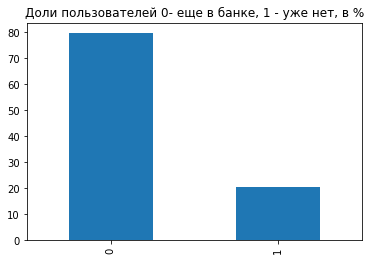

In [11]:
((df['Exited'].value_counts(normalize=True))*100).plot(kind='bar').set_title(
    'Доли пользователей 0- еще в банке, 1 - уже нет, в %')
plt.show()

Посчитаем, сколько юзверей ушло из банка. 

In [12]:
user_status=pd.DataFrame(df['Exited'].value_counts())
user_status=user_status.reset_index()
user_status.columns=['exit 1/0','quantity']
display(user_status)

,exit 1/0,quantity
0,0,7963
1,1,2037


### Помежуточный вывод номер раз :
Данные по результатам предварительного осмотра пригодны для обработки и построения модели. Выборка состоит преимущественно из юзверей, которые еще не ушли из банка (7963) против 2037 подтвержденных случаев ухода

In [13]:
df_exit=df[df['Exited']>0]

In [14]:
df_stay=df[df['Exited']==0]

In [15]:
#Функция визуализации данных
def visual_part2(df_exit,df_stay):
    print('CreditScore distribution')
    a=plt.hist([df_exit['CreditScore'], df_stay['CreditScore']],bins = 30,
             color =('pink','blue'),label=("exit CreditScore", "stay CreditScore"))
    plt.xlabel("CreditScore")
    plt.ylabel("Количество пользователей")
    
    plt.legend(loc='best')
    plt.show()
    
    print('Age distribution')
    plt.hist([df_exit['Age'], df_stay['Age']],bins = 30,color =('pink','blue'),label=("exit Age", "stay Age"))
    plt.xlabel("Age")
    plt.ylabel("Количество пользователей")
    plt.legend(loc='best')
    plt.show()
    
    print('Tenure distribution')
    plt.hist([df_exit['Tenure'], df_stay['Tenure']],bins = 30,color =('pink','blue'),
             label=("exit Tenure", "stay Tenure"))
    plt.xlabel("Tenure")
    plt.ylabel("Количество пользователей")
    plt.legend(loc='best')
    plt.show()
    
    print('Balance distribution')
    plt.hist([df_exit['Balance'], df_stay['Balance']],bins = 30,color =('pink','blue'),
             label=("exit Balance", "stay Balance"))
    plt.xlabel("Balance")
    plt.ylabel("Количество пользователей")
    plt.legend(loc='best')
    plt.show()
    
    print('NumOfProducts distribution')
    plt.hist([df_exit['NumOfProducts'], df_stay['NumOfProducts']],bins = 30,color =('pink','blue'),
             label=("exit NumOfProducts", "stay NumOfProducts"))
    plt.xlabel("NumOfProducts")
    plt.ylabel("Количество пользователей")
    plt.legend(loc='best')
    plt.show()
    
    
    print('HasCrCard distribution')
    plt.hist([df_exit['HasCrCard'], df_stay['HasCrCard']],bins = 30,color =('pink','blue'),
             label=("exit HasCrCard", "stay HasCrCard"))
    plt.xlabel("HasCrCard")
    plt.ylabel("Количество пользователей")
    plt.legend(loc='best')
    plt.show()
    
    print('IsActiveMember distribution')
    plt.hist([df_exit['IsActiveMember'], df_stay['IsActiveMember']],bins = 30,color =('pink','blue'),
             label=("exit IsActiveMember", "stay IsActiveMember"))
    plt.xlabel("IsActiveMember")
    plt.ylabel("Количество пользователей")
    plt.legend(loc='best')
    plt.show()
    
    print('EstimatedSalary distribution')
    plt.hist([df_exit['EstimatedSalary'], df_stay['EstimatedSalary']],bins = 30,color =('pink','blue'),
             label=("exit EstimatedSalary", "stay EstimatedSalary"))
    plt.xlabel("EstimatedSalary")
    plt.ylabel("Количество пользователей")
    plt.legend(loc='best')
    plt.show()
    		
    

CreditScore distribution


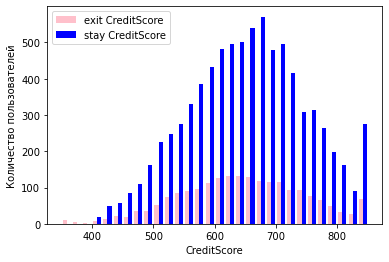

Age distribution


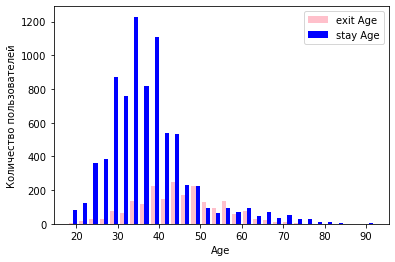

Tenure distribution


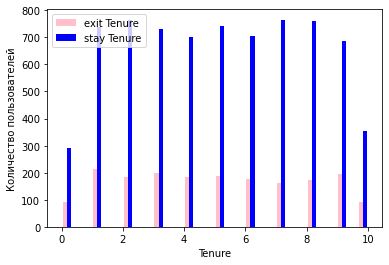

Balance distribution


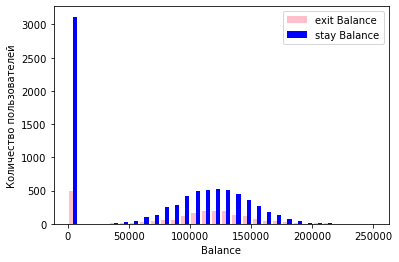

NumOfProducts distribution


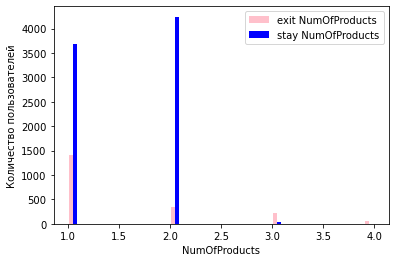

HasCrCard distribution


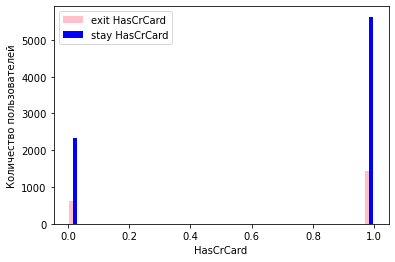

IsActiveMember distribution


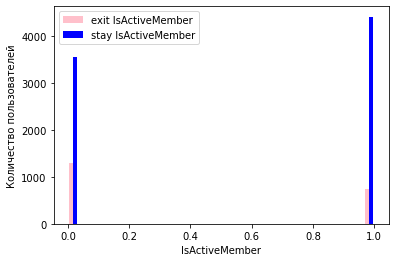

EstimatedSalary distribution


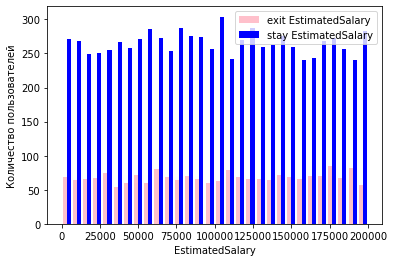

In [16]:
visual_part2(df_exit,df_stay)

### Помежуточный вывод номер два:
По подгруппам пользователей - группы пользователей имеют схожие распределения по категориям, что подтверждает пригодность данных к построению моделей. Явной внутренней схожести между критериями не наблюдается

In [17]:
print('Exit user describe')
display(df_exit.describe().drop(['RowNumber','CustomerId','Exited'],axis=1))

Exit user describe


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,2037.000000,2037.000000,1854.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,645.351497,44.837997,4.901834,91108.539337,1.475209,0.699067,0.360825,101465.677531
std,100.321503,9.761562,2.944727,58360.794816,0.801521,0.458776,0.480358,57912.418071
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,578.000000,38.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000
50%,646.000000,45.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000
75%,716.000000,51.000000,7.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000


In [18]:
print('Stay user describe')
display(df_stay.describe().drop(['RowNumber','CustomerId','Exited'],axis=1))
display(df_stay.columns)

Stay user describe


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,7963.000000,7963.000000,7237.000000,7963.000000,7963.000000,7963.000000,7963.000000,7963.000000
mean,651.853196,37.408389,5.022247,72745.296779,1.544267,0.707146,0.554565,99738.391772
std,95.653837,10.125363,2.881467,62848.040701,0.509536,0.455101,0.497045,57405.586966
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000
25%,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.490000
50%,653.000000,36.000000,5.000000,92072.680000,2.000000,1.000000,1.000000,99645.040000
75%,718.000000,41.000000,7.000000,126410.280000,2.000000,1.000000,1.000000,148609.955000
max,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [19]:
def iqr(dataframe):
    for value in dataframe.columns:
        q1,q3=np.percentile(dataframe,[25,75])
        iqr=q3-q1
        low_limit=q1-1.5*iqr
        high_limit=q3+1.5*iqr
    
    return pd.DataFrame(['q1','q3','iqr','low_limit','high_limit'],[q1,q3,iqr,low_limit,high_limit],
                           columns=value)
    

In [20]:
df_stay_numer=df_stay[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']]

In [21]:
df_exit_numer=df_exit[['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']]

In [22]:
# Функция вывода пределов для сброса по методу IQR принимает на вход массив.describe() из числовых значений
# Рекомендация  использовать значения типа float | int 
# индекс- колонка с названием исходного столбца для нашего случая 
#'index','CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary'
def iqr(stat_df_describe):
    stat_df_describe=pd.DataFrame(stat_df_describe.describe())
    stat_df_describe=stat_df_describe.reset_index(drop=True)
    top_limit=[]
    bot_limit=[]
    columns_lst=[]
    for value in stat_df_describe.columns:
        limit_up=stat_df_describe[value][6]+1.5*(stat_df_describe[value][6]-stat_df_describe[value][4])
        limit_low=stat_df_describe[value][4]-1.5*(stat_df_describe[value][6]-stat_df_describe[value][4])
        top_limit.append(limit_up)
        if limit_low<0:
            bot_limit.append(0)
        else:
            bot_limit.append(limit_low)
        columns_lst.append(value)
        dictionary={'Columns':columns_lst, 'Top_limit':top_limit,'Bot_limit':bot_limit}
        a=pd.DataFrame(dictionary)
                
        
    return a

In [23]:
df_stay_numer_lim=iqr(df_stay_numer)
df_exit_numer_lim=iqr(df_exit_numer)

In [24]:
display(df_stay_numer_lim)
display(df_exit_numer_lim)


,Columns,Top_limit,Bot_limit
0,CreditScore,917.5000,385.5
1,Age,56.0000,16.0
2,Tenure,13.0000,0.0
3,Balance,316025.7000,0.0
4,NumOfProducts,3.5000,0.0
5,EstimatedSalary,295349.6525,0.0


,Columns,Top_limit,Bot_limit
0,CreditScore,923.000,371.0
1,Age,70.500,18.5
2,Tenure,14.500,0.0
3,Balance,271073.295,0.0
4,NumOfProducts,3.500,0.0
5,EstimatedSalary,303195.695,0.0


In [25]:
display(df_exit.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [26]:
intrest_df_exit=df_exit[(df_exit['CreditScore']<df_exit_numer_lim['Top_limit'][0])&
                        (df_exit['CreditScore']>=df_exit_numer_lim['Bot_limit'][0])&
                        (df_exit['Age']<df_exit_numer_lim['Top_limit'][1])&
                        (df_exit['Age']>=df_exit_numer_lim['Bot_limit'][1])&
                        (df_exit['Tenure']<df_exit_numer_lim['Top_limit'][2])&
                        (df_exit['Tenure']>=df_exit_numer_lim['Bot_limit'][2])&
                        (df_exit['Balance']<df_exit_numer_lim['Top_limit'][3])&
                        (df_exit['Balance']>=df_exit_numer_lim['Bot_limit'][3])&
                        (df_exit['NumOfProducts']<df_exit_numer_lim['Top_limit'][4])&
                        (df_exit['NumOfProducts']>=df_exit_numer_lim['Bot_limit'][4])&
                        (df_exit['EstimatedSalary']<df_exit_numer_lim['Top_limit'][5])&
                        (df_exit['EstimatedSalary']>=df_exit_numer_lim['Bot_limit'][5])]
                        

In [27]:
intrest_df_stay=df_stay[(df_stay['CreditScore']<df_stay_numer_lim['Top_limit'][0])&
                        (df_stay['CreditScore']>=df_stay_numer_lim['Bot_limit'][0])&
                        (df_stay['Age']<df_stay_numer_lim['Top_limit'][1])&
                        (df_stay['Age']>=df_stay_numer_lim['Bot_limit'][1])&
                        (df_stay['Tenure']<df_stay_numer_lim['Top_limit'][2])&
                        (df_stay['Tenure']>=df_stay_numer_lim['Bot_limit'][2])&
                        (df_stay['Balance']<df_stay_numer_lim['Top_limit'][3])&
                        (df_stay['Balance']>=df_stay_numer_lim['Bot_limit'][3])&
                        (df_stay['NumOfProducts']<df_stay_numer_lim['Top_limit'][4])&
                        (df_stay['NumOfProducts']>=df_stay_numer_lim['Bot_limit'][4])&
                        (df_stay['EstimatedSalary']<df_stay_numer_lim['Top_limit'][5])&
                        (df_stay['EstimatedSalary']>=df_stay_numer_lim['Bot_limit'][5])]


CreditScore distribution


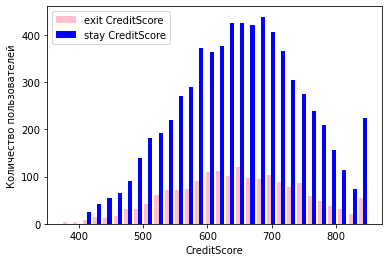

Age distribution


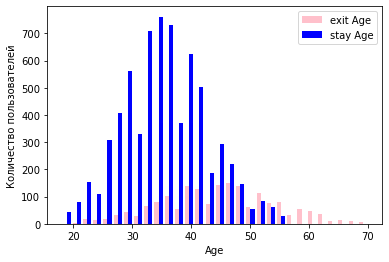

Tenure distribution


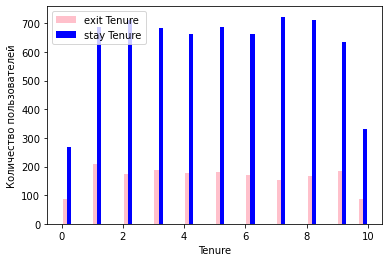

Balance distribution


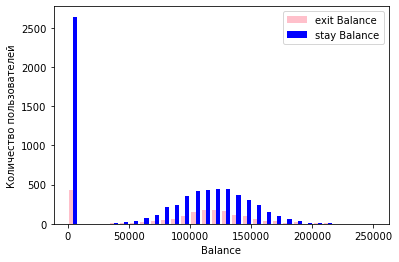

NumOfProducts distribution


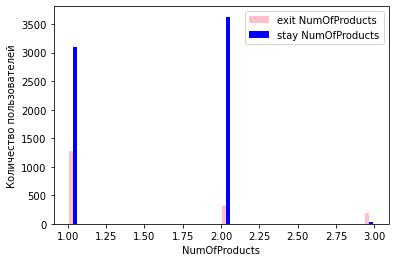

HasCrCard distribution


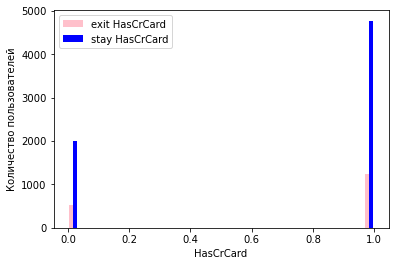

IsActiveMember distribution


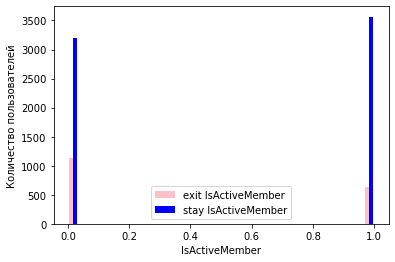

EstimatedSalary distribution


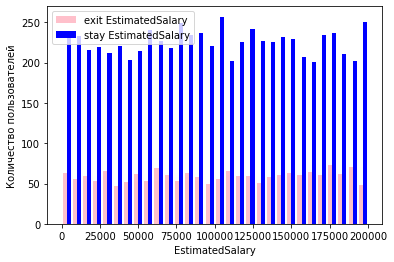

In [28]:
visual_part2(intrest_df_exit,intrest_df_stay)

In [29]:
intrest_df_exit.shape

(1775, 14)

In [30]:
intrest_df_stay.shape

(6766, 14)

In [31]:
standart_data=pd.concat([intrest_df_exit,intrest_df_stay])

In [32]:
display(standart_data.shape)

(8541, 14)

Так-с, данных стало чуть меньше, чем было 

In [33]:
print('Остаток данных отосительно исходного массива после сброса по IQR',
      (standart_data.shape[0]/df.shape[0])*100,'в %')

Остаток данных отосительно исходного массива после сброса по IQR 85.41 в %


Рассмотрим корелляцию между features

In [34]:
standart_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [35]:
#Функция, возвращает датафрейм с данными о корелляции по количественным переменным, исключены поля
#'RowNumber','CustomerId','Surname','Geography','Gender','HasCrCard','IsActiveMember','Exited'
def hard_corr(df1):
    corr_search=df1.drop(['RowNumber','CustomerId','Surname','Geography',
                          'Gender','HasCrCard','IsActiveMember','Exited'], axis=1)
    return corr_search.corr()

In [36]:
hard_corr(standart_data)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.012942,-0.001420,0.007355,0.006856,0.009195
Age,-0.012942,1.000000,-0.015670,0.055298,-0.062726,0.000625
Tenure,-0.001420,-0.015670,1.000000,-0.010715,0.011968,0.008193
Balance,0.007355,0.055298,-0.010715,1.000000,-0.327384,0.012355
NumOfProducts,0.006856,-0.062726,0.011968,-0.327384,1.000000,0.013559
EstimatedSalary,0.009195,0.000625,0.008193,0.012355,0.013559,1.000000


Слабая отрицательная взаимосвязь между Balance и NumOfProducts

Посмотрим, что у нас с булевыми признаками. Считать ли пол булевым признаком ? Пока его просто дропнем

In [37]:
#Функция, возвращает датафрейм с данными о корелляции по количественным переменным, исключены поля
#'RowNumber','CustomerId','Surname','Geography','Gender','HasCrCard','IsActiveMember','Exited'
def hard_corr_b(df1):
    corr_search=df1.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'], axis=1)
    return corr_search.corr()

In [38]:
hard_corr_b(standart_data)

,HasCrCard,IsActiveMember,Exited
HasCrCard,1.000000,-0.008742,-0.004850
IsActiveMember,-0.008742,1.000000,-0.136828
Exited,-0.004850,-0.136828,1.000000


Слабая отрицательная взаимосвязь между  Exited и  IsActiveMember

Немного порассуждаем. Обучать мы будем на всем массиве? или на нашем стандартизированном.


Не наривится мне, что после сброса не ушли пики по CreditScore distribution для юзеров с  CreditScore >800,  Balance distribution около 0

Но, это нам не сильно помешает в последующем решении

### Вывод по блоку 'Подготовка данных':

По подгруппам пользователей - группы пользователей имеют схожие распределения по категориям, что подтверждает пригодность данных к построению моделей. 

Явной внутренней схожести между критериями не наблюдается.
Остаток данных отосительно исходного массива после сброса по IQR 85.41 в %

Нам неизвестна методика подсчета CreditScore, а также размерность Tenure.
HasCrCard -тип bool
IsActiveMember - тип bool

EstimatedSalary - неизвестна методика расчета 
Exited - тип bool


Также нам ничего неизвестно о периоде, за которые были получены данные. Можно как в проекте об потенциальном возврате кридита 
разделить юзеров по категориям по критерию баланс

Слабая отрицательная взаимосвязь между Balance и NumOfProducts

Слабая отрицательная взаимосвязь между Exited и IsActiveMember

 Наблюдается дисбаланс, число юзеров, которые остались превышает число юзеров, которые вышли  приблизительно в 4 раза

In [39]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Дропаем атрибуты юзверя  'RowNumber','CustomerId','Surname','Geography'

## Борьба с дисбалансом

Оставляем для построения модели следующие признаки 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'.
       
 При решении будем использовать массив после сброса по IQR standart_data

In [40]:
user_status=pd.DataFrame(standart_data['Exited'].value_counts())
user_status=user_status.reset_index()
user_status.columns=['exit 1/0','quantity']
display(user_status)

,exit 1/0,quantity
0,0,6766
1,1,1775


In [41]:
standart_data=standart_data.drop(['RowNumber','CustomerId'],axis=1)

При решении будем использовать upsampling или downsampling

In [42]:
data = standart_data
data_ohe = pd.get_dummies(standart_data, drop_first=True)
target = data_ohe['Exited']
features = data_ohe.drop(['Exited'] , axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

numeric = ['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

print(features_train.shape)
print(features_valid.shape)


(6405, 2708)
(2136, 2708)


У нас наблюдается дисбаланс, число юзеров, которые остались превышает число юзеров, которые вышли  приблизительно в 4 раза

Нужно построить модель для задачи классификации кандидаты: DecisionTreeClassifier, RandomForestRegressor,LogisticRegression

А насчет ап/даунсемплинга работает аксиома, но для данного случая лучше подойдет даунсэмплинг, ибо у нас достаточно юзверей, которые еще не вышли. Кстати, формулировка из ТЗ в стиле "Кокаинового медведя" f1 score для какой конкретно метрики, для предсказания Exit или для предсказания stay?

### Вывод по блоку 'Борьба с дисбалансом':

Берем параметр frac=0.25, используем downsampling. Также малость уменьшили число юзверей за счет сброса по IQR

## Обучение моделей

Продолжим
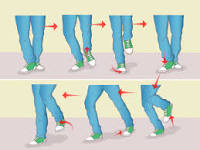

LogisticRegression без балансировки класса 

In [43]:
%%time
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction,
                               random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, 
                             random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)
print('Соотношение классов')
print( target_downsampled.value_counts())
model = LogisticRegression(random_state=12345, solver='liblinear')
model=model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))

Соотношение классов
1    1337
0     507
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.94      0.42      0.58      1698
        exit       0.29      0.90      0.43       438

    accuracy                           0.52      2136
   macro avg       0.61      0.66      0.51      2136
weighted avg       0.81      0.52      0.55      2136

confusion_matrix
[[713 985]
 [ 44 394]]
Wall time: 177 ms


LogisticRegression class_weight='balanced'

In [44]:
%%time
model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model=model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))


              precision    recall  f1-score   support

        stay       0.92      0.71      0.80      1698
        exit       0.41      0.77      0.53       438

    accuracy                           0.72      2136
   macro avg       0.66      0.74      0.67      2136
weighted avg       0.82      0.72      0.75      2136

confusion_matrix
[[1202  496]
 [  99  339]]
Wall time: 104 ms


Посмотрим как себя поведут другие модели

RandomForestClassifier без балансировки

In [45]:
%%time
model = RandomForestClassifier(random_state=12345, n_estimators=50,max_depth=10) # обучите модель с заданным количеством деревьев
model=model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
print('Соотношение классов')
print( target_downsampled.value_counts())
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))

Соотношение классов
1    1337
0     507
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.00      0.00      0.00      1698
        exit       0.21      1.00      0.34       438

    accuracy                           0.21      2136
   macro avg       0.10      0.50      0.17      2136
weighted avg       0.04      0.21      0.07      2136

confusion_matrix
[[   0 1698]
 [   0  438]]
Wall time: 223 ms


RandomForestClassifier с балансировкой

In [46]:
%%time
model = RandomForestClassifier(random_state=12345, n_estimators=50,max_depth=10,class_weight='balanced') # обучите модель с заданным количеством деревьев
model=model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
print('Соотношение классов')
print( target_downsampled.value_counts())
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))


Соотношение классов
1    1337
0     507
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.94      0.62      0.75      1698
        exit       0.36      0.84      0.51       438

    accuracy                           0.66      2136
   macro avg       0.65      0.73      0.63      2136
weighted avg       0.82      0.66      0.70      2136

confusion_matrix
[[1053  645]
 [  71  367]]
Wall time: 197 ms


DecisionTreeClassifier без балансировки

In [47]:
%%time
model=DecisionTreeClassifier(random_state=123456)
model.fit(features_train,target_train)
model=model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
print('Соотношение классов')
print( target_downsampled.value_counts())
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))

Соотношение классов
1    1337
0     507
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.94      0.57      0.71      1698
        exit       0.34      0.85      0.49       438

    accuracy                           0.63      2136
   macro avg       0.64      0.71      0.60      2136
weighted avg       0.82      0.63      0.67      2136

confusion_matrix
[[973 725]
 [ 64 374]]
Wall time: 800 ms


DecisionTreeClassifier с балансировкой

In [48]:
%%time
model=DecisionTreeClassifier(random_state=123456,class_weight='balanced')
model.fit(features_train,target_train)
model=model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
print('Соотношение классов')
print( target_downsampled.value_counts())
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))

Соотношение классов
1    1337
0     507
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.93      0.66      0.77      1698
        exit       0.38      0.80      0.51       438

    accuracy                           0.69      2136
   macro avg       0.65      0.73      0.64      2136
weighted avg       0.82      0.69      0.72      2136

confusion_matrix
[[1114  584]
 [  86  352]]
Wall time: 638 ms


Нормуль, по итогу берем модельку LogisticRegression class_weight='balanced' и радуемся

In [49]:
%%time

model = LogisticRegression(random_state=123456, solver='liblinear',class_weight='balanced')

model=model.fit(features_downsampled, target_downsampled)

predicted_valid=model.predict(features_valid)
print('Соотношение классов')
print( target_downsampled.value_counts())

print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))



Соотношение классов
1    1337
0     507
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.92      0.71      0.80      1698
        exit       0.41      0.77      0.53       438

    accuracy                           0.72      2136
   macro avg       0.66      0.74      0.67      2136
weighted avg       0.82      0.72      0.75      2136

confusion_matrix
[[1202  496]
 [  99  339]]
Wall time: 95 ms


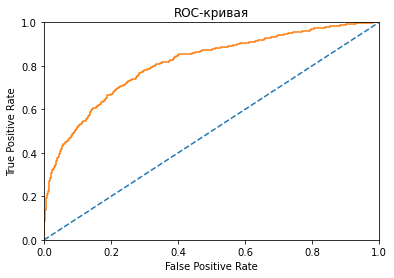

In [50]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 


In [51]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc=roc_auc_score(target_valid,probabilities_one_valid)

print(auc_roc)

0.8119665359730224


In [52]:
%%time
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction,
                               random_state=123456)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, 
                             random_state=123456)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
print('Соотношение классов')
print( target_downsampled.value_counts())
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))

Соотношение классов
1    1337
0    1267
Name: Exited, dtype: int64
confusion_matrix
[[1202  496]
 [  99  339]]
Wall time: 103 ms


In [53]:
%%time
model = LogisticRegression(random_state=123456, solver='liblinear',class_weight='balanced')
model=model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
print('Соотношение классов')
print( target_downsampled.value_counts())
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))


Соотношение классов
1    1337
0    1267
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.91      0.76      0.83      1698
        exit       0.43      0.70      0.53       438

    accuracy                           0.75      2136
   macro avg       0.67      0.73      0.68      2136
weighted avg       0.81      0.75      0.77      2136

confusion_matrix
[[1289  409]
 [ 130  308]]
Wall time: 125 ms


In [54]:
%%time
model = RandomForestClassifier(random_state=123456, n_estimators=50,max_depth=10,class_weight='balanced') # обучите модель с заданным количеством деревьев
model=model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
print('Соотношение классов')
print( target_downsampled.value_counts())
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))

Соотношение классов
1    1337
0    1267
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.90      0.71      0.79      1698
        exit       0.38      0.69      0.49       438

    accuracy                           0.71      2136
   macro avg       0.64      0.70      0.64      2136
weighted avg       0.79      0.71      0.73      2136

confusion_matrix
[[1209  489]
 [ 137  301]]
Wall time: 255 ms


In [55]:
%%time
model = RandomForestClassifier(random_state=123456,class_weight='balanced')
model=model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
print('Соотношение классов')
print( target_downsampled.value_counts())
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))



Соотношение классов
1    1337
0    1267
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.93      0.80      0.86      1698
        exit       0.50      0.77      0.61       438

    accuracy                           0.79      2136
   macro avg       0.71      0.78      0.73      2136
weighted avg       0.84      0.79      0.81      2136

Wall time: 1.99 s


In [56]:
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))

confusion_matrix
[[1359  339]
 [ 101  337]]


In [57]:
%%time
model=DecisionTreeClassifier(random_state=123456,class_weight='balanced')
model=model.fit(features_downsampled, target_downsampled)
predicted_valid=model.predict(features_valid)
print('Соотношение классов')
print( target_downsampled.value_counts())
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))

Соотношение классов
1    1337
0    1267
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.93      0.77      0.84      1698
        exit       0.46      0.76      0.57       438

    accuracy                           0.77      2136
   macro avg       0.69      0.77      0.71      2136
weighted avg       0.83      0.77      0.79      2136

Wall time: 148 ms


In [58]:
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))

confusion_matrix
[[1306  392]
 [ 104  334]]


### Вывод по блоку 'Обучение моделей':
Для решения поставленной задачи по критерию F1 подходит RandomForestClassifier. F1=0.86 для класса stay, 0.61 для класса exit

   

## Тестирование лучшей модели

In [59]:
%%time
for depth in range(1, 10):
    model=RandomForestClassifier(random_state=123456,max_depth=depth,class_weight='balanced')
    model=model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    
    predicted_valid=model.predict(features_valid)
    print('max_depth', depth)
    print('Соотношение классов')
    print( target_downsampled.value_counts())
    print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
    print('__________________________________________________________________________________')
    
    

    

max_depth 1
Соотношение классов
1    1337
0    1267
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.91      0.77      0.84      1698
        exit       0.44      0.71      0.55       438

    accuracy                           0.76      2136
   macro avg       0.68      0.74      0.69      2136
weighted avg       0.82      0.76      0.78      2136

__________________________________________________________________________________
max_depth 2
Соотношение классов
1    1337
0    1267
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.91      0.76      0.83      1698
        exit       0.43      0.70      0.53       438

    accuracy                           0.75      2136
   macro avg       0.67      0.73      0.68      2136
weighted avg       0.81      0.75      0.77      2136

__________________________________________________________________________________
max_depth 3
Соотношени

Моделька хорошо показывает себя при значении гиперпараметра depth==5. Перейдем к est

In [60]:
for est in range(1, 200,10):
    model=RandomForestClassifier(random_state=123456,max_depth=5,n_estimators=est,class_weight='balanced')
    model=model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    
    predicted_valid=model.predict(features_valid)
    print('est', est)
    print('Соотношение классов')
    print( target_downsampled.value_counts())
    print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
    print('__________________________________________________________________________________')

est 1
Соотношение классов
1    1337
0    1267
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.89      0.09      0.16      1698
        exit       0.21      0.96      0.35       438

    accuracy                           0.27      2136
   macro avg       0.55      0.52      0.25      2136
weighted avg       0.75      0.27      0.20      2136

__________________________________________________________________________________
est 11
Соотношение классов
1    1337
0    1267
Name: Exited, dtype: int64
              precision    recall  f1-score   support

        stay       0.87      0.59      0.70      1698
        exit       0.29      0.66      0.41       438

    accuracy                           0.61      2136
   macro avg       0.58      0.63      0.56      2136
weighted avg       0.75      0.61      0.64      2136

__________________________________________________________________________________
est 21
Соотношение классов
1    1

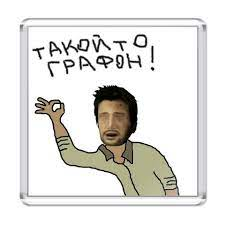

In [61]:
#модель с depth==5 и est 131
model=RandomForestClassifier(random_state=123456,max_depth=5,n_estimators=131,class_weight='balanced')
model=model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
predicted_valid=model.predict(features_valid)
print('classification_report')
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix')
print(confusion_matrix(target_valid,predicted_valid))

classification_report
              precision    recall  f1-score   support

        stay       0.92      0.81      0.86      1698
        exit       0.49      0.71      0.58       438

    accuracy                           0.79      2136
   macro avg       0.70      0.76      0.72      2136
weighted avg       0.83      0.79      0.80      2136

confusion_matrix
[[1374  324]
 [ 125  313]]


RandomForestClassifier 0.8119665359730224


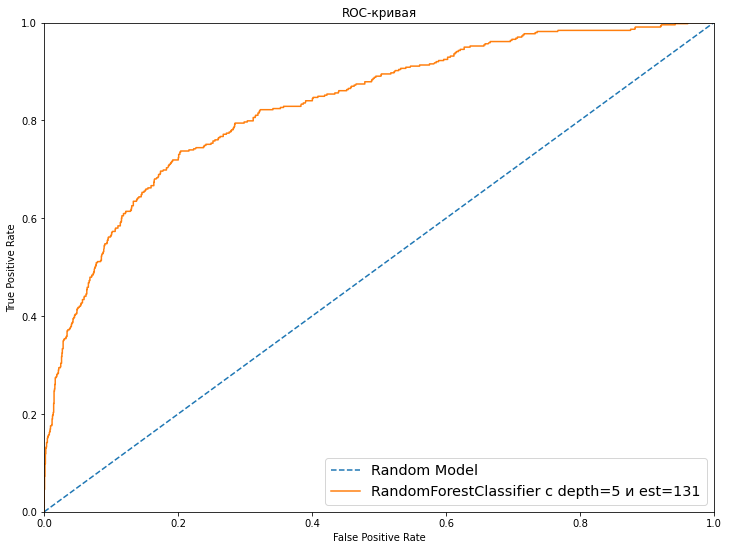

In [62]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model')



print('RandomForestClassifier',auc_roc)

plt.plot(fpr, tpr, label='RandomForestClassifier с depth=5 и est=131')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

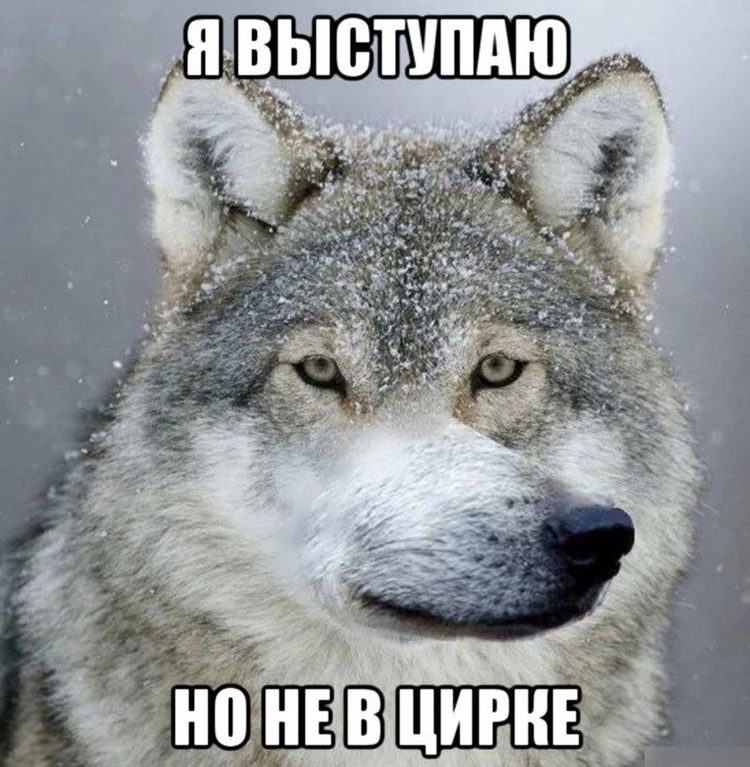

In [63]:

features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.4, 
                                                                              random_state=123456 )

In [64]:
model=RandomForestClassifier(random_state=123456,max_depth=5,n_estimators=131,class_weight='balanced')
model=model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)
predictions_test=model.predict(features_test)

predicted_valid=model.predict(features_valid)
predicted_test=model.predict(features_test)

print('classification_report_valid')
print(classification_report(target_valid,predicted_valid,target_names=['stay','exit']))
print('confusion_matrix_valid')
print(confusion_matrix(target_valid,predicted_valid))


print('classification_report_test')
print(classification_report(target_test,predicted_test,target_names=['stay','exit']))
print('confusion_matrix_test')
print(confusion_matrix(target_test,predicted_test))


classification_report_valid
              precision    recall  f1-score   support

        stay       0.91      0.79      0.84      1014
        exit       0.46      0.69      0.55       267

    accuracy                           0.77      1281
   macro avg       0.68      0.74      0.70      1281
weighted avg       0.81      0.77      0.78      1281

confusion_matrix_valid
[[801 213]
 [ 83 184]]
classification_report_test
              precision    recall  f1-score   support

        stay       0.93      0.84      0.88       684
        exit       0.54      0.75      0.63       171

    accuracy                           0.82       855
   macro avg       0.73      0.80      0.75       855
weighted avg       0.85      0.82      0.83       855

confusion_matrix_test
[[573 111]
 [ 42 129]]


RandomForestClassifier_valid 0.8119665359730224
RandomForestClassifier_test 0.8478677199822168


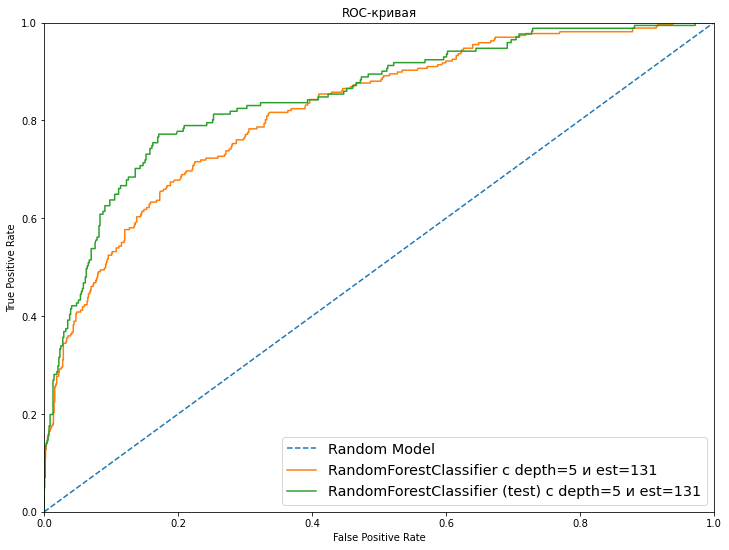

In [65]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_test = model.predict_proba(features_test)

probabilities_one_valid = probabilities_valid[:, 1]
probabilities_one_test = probabilities_test[:, 1]

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])
precision_test, recall_test, thresholds_test = precision_recall_curve(target_test, probabilities_test[:, 1])

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
fpr_test, tpr_test, thresholds_test = roc_curve(target_test, probabilities_one_test) 

plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Model')



print('RandomForestClassifier_valid',auc_roc)
auc_roc_test=roc_auc_score(target_test,probabilities_one_test)
print('RandomForestClassifier_test',auc_roc_test)

plt.plot(fpr, tpr, label='RandomForestClassifier с depth=5 и est=131')
plt.plot(fpr_test, tpr_test, label='RandomForestClassifier (test) с depth=5 и est=131')


plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

### Вывод по блоку 'Тестирование лучшей модели':
Модель RandomForestClassifier показывает хороший результат при значении гиперпараметра depth==5  и est 131. Значение auc_roc 0.8119665359730224. При тесте  результат auc_roc 0.8478677199822168.

Ниже результаты валидационной и тестовой модели


classification_report_valid
              precision    recall  f1-score   support

        stay       0.91      0.79      0.84      1014
        exit       0.46      0.69      0.55       267

    accuracy                           0.77      1281
   macro avg       0.68      0.74      0.70      1281
weighted avg       0.81      0.77      0.78      1281

confusion_matrix_valid


[[801 213]


[ 83 184]]
 
 
classification_report_test
              precision    recall  f1-score   support

        stay       0.93      0.84      0.88       684
        exit       0.54      0.75      0.63       171

    accuracy                           0.82       855
   macro avg       0.73      0.80      0.75       855
weighted avg       0.85      0.82      0.83       855

confusion_matrix_test


[[573 111]


[ 42 129]]




## Вывод по проекту:

По подгруппам пользователей - группы пользователей имеют схожие распределения по категориям, что подтверждает пригодность данных к построению моделей. 

Явной внутренней схожести между критериями не наблюдается.
Остаток данных отосительно исходного массива после сброса по IQR 85.41 в %

Нам неизвестна методика подсчета CreditScore, а также размерность Tenure.
HasCrCard -тип bool
IsActiveMember - тип bool

EstimatedSalary - неизвестна методика расчета 
Exited - тип bool


Также нам ничего неизвестно о периоде, за которые были получены данные. Можно как в проекте об потенциальном возврате кридита 
разделить юзеров по категориям по критерию баланс

Слабая отрицательная взаимосвязь между Balance и NumOfProducts

Слабая отрицательная взаимосвязь между Exited и IsActiveMember

 Наблюдается дисбаланс, число юзеров, которые остались превышает число юзеров, которые вышли  приблизительно в 4 раза
 
Берем параметр frac=0.25, используем downsampling. Также малость уменьшили число юзверей за счет сброса по IQR

Для решения поставленной задачи по критерию F1 подходит RandomForestClassifier. F1=0.86 для класса stay, 0.61 для класса exit

Модель RandomForestClassifier показывает хороший результат при значении гиперпараметра depth==5  и est 131. Значение auc_roc 0.8119665359730224. При тесте  результат auc_roc 0.8478677199822168.

Модель на основе RandomForestClassifier подходит для решения поставленной задачи


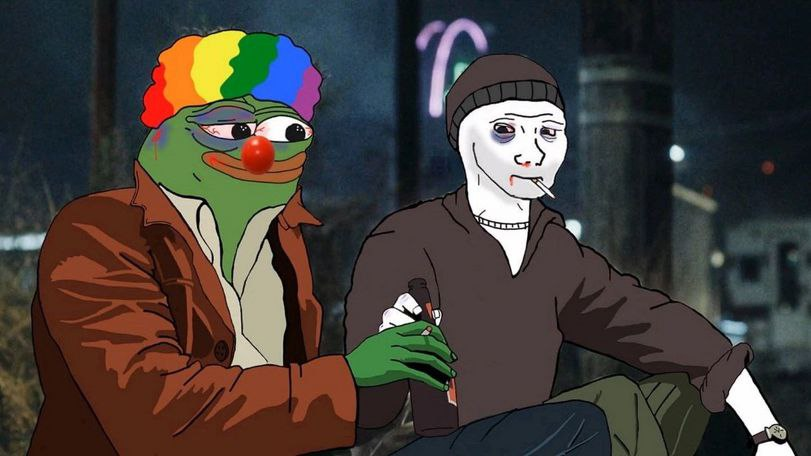